<a href="https://colab.research.google.com/github/Ivonne-Rojas/Simulation-of-Different-Age-Distributions-for-the-Analysis-of-the-Aging-Curve-of-a-Population-of-S./blob/main/Synchronous_exponential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import collections as coll 
import random
from time import time
from timeit import timeit

In [ ]:
initial_time = time()# we use this library to calculate execution time   
#-------------------------------------------------------------------------------
#initial variables 
s=[]#this list is for save the replication times
celulas=[]# this list is for save the total number of cells 
zi=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]# initial age distribution 
t=0 # total time   
R=0 # to count the replicative times 
tr=[]#list to save the total time in each iteration
m=18 # number to determine the generation in which the cells die 
muertes=0# variable to count the number of dead and non-viable cells 
fraccion=[]# list to save the fraction of viable cells 
r=0 # per capita growth
g=25 # number of generations that growth the population 
#------------------------------------------------------------------------------- 
for j in range(g): 
  zf=np.zeros(m,dtype=np.int64) # It has a defined length which is determined by the generation in which the cells die
  for i in range(m-1):  
    zf[i+1]= zi[i]
    zf[0]=sum(zi)-zi[-1]
  zi=zf 
#-------------------------------------------------------------------------------
  R=R+120 # 120 is the constant replicative time, in minutes, that we took 
  s.append(R)
  celulas.append(sum(zi)) 
#-------------------------------------------------------------------------------
  t=t+max(s)    # total time 
  tr.append(t)
#-------------------------------------------------------------------------------
#calculations 
  muertes=muertes+zf[-1]#list to save the dead cells
  total_celulas= sum(zi)+muertes # total cells, viable cells plus dead cells  
  fraccion_viables= (sum(zi)-zi[-1])/total_celulas #fraction of viable cells  
  fraccion.append(fraccion_viables)
  r=zi[0]-muertes 
#-------------------------------------------------------------------------------
  print('age distribution', zi)
  #print('s',s)
  #print('time',t) 
  #print('time list',tr) # 
  print('Non-viable cells', muertes) 
  #print('growth rate', r)#
  #print('viable cells ', total)
  #print('total of population ',total_celulas)
  #print('fraction of viable cells',fraccion_viables)
  #print('list of viable cells fraction', fraccion)
  print('---------------')
#-------------------------------------------------------------------------------
print(len(zi))
final_time = time()
execution_time = final_time - initial_time
#print('execution time',execution_time)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[4 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[8 4 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[32 16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[64 32 16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0   0   0]
No viable 0
---------------
[256 128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0   0]
No viable 0
---------------
[512 256 128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0]
No viable 0
---------------
[1024  512  256  128   64   32   16    8    4    2    1    1    0    0
    0    0    0    0]
No viable 0
---------------
[2048 1024  512  256  128   64   32   16    8    4    2  

**Age Distribution** 

In [ ]:
edad=[]#Ages 
ind=-1
for i in range(len(zi)):
  ind=ind+1
  edad.append(ind)
print('Age',edad)

Age [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


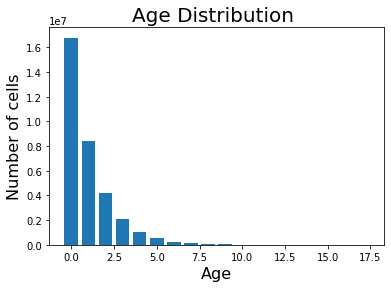

In [ ]:
fig, ax = plt.subplots()
axes = plt.gca() 
ax.set_ylabel('Number of cells')
ax.set_xlabel('Age')
ax.set_title('Age Distribution ')
plt.bar(edad, zi)
axes.title.set_size(20)
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.savefig('Age Distribution.png')
plt.show()

Growth curve (time)



 

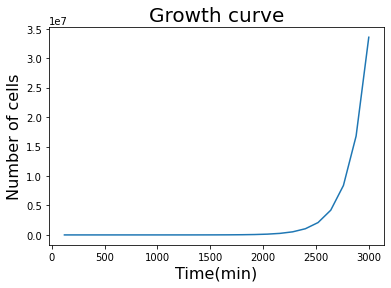

In [ ]:
plt.plot(s,celulas) 
axes = plt.gca() 
plt.xlabel('Time(min)')
plt.ylabel('Number of cells')
plt.title('Growth curve')
axes.title.set_size(20)
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.savefig('Growth Curve  time')
plt.show() 

growth rate (time) 

In [ ]:
pendientes=[] #slope 
for i in range(len(celulas)-1):
  y=np.log(celulas[i+1])-np.log(celulas[i])
  x=s[i+1]-s[i]
  pendiente=y/x
  pendientes.append(pendiente)
print(pendientes)
print(len(pendientes))
print(sum(pendientes)/len(pendientes))

[0.0057762265046662105, 0.00577622650466621, 0.005776226504666211, 0.005776226504666211, 0.005776226504666208, 0.005776226504666211, 0.005776226504666211, 0.005776226504666211, 0.005776226504666211, 0.005776226504666211, 0.005776226504666204, 0.005776226504666211, 0.005776226504666211, 0.005776226504666211, 0.005776226504666211, 0.005776226504666211, 0.005776162926135919, 0.005776194715219166, 0.0057761947150978855, 0.0057761947149766344, 0.005776194714855354, 0.005776194714734073, 0.005776194714612822, 0.005776194714491526]
24
0.005776214583532614


Growth curve (generations)

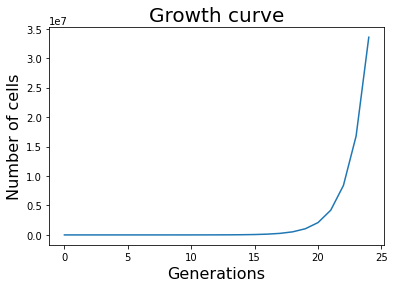

In [ ]:
plt.plot(celulas) # 
axes = plt.gca() 
plt.xlabel('Generations')
plt.ylabel('Number of cells')
plt.title('Growth curve')
axes.title.set_size(20)
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.savefig('Growth Curve g=25')
plt.show() #mostar el grafico 

growth rate (generations) 

In [ ]:
gen=[]
g=0
for i in range(len(celulas)):
  g=g+1
  gen.append(g)

In [ ]:
pendientes=[]
for i in range(len(celulas)-1):
  y=np.log(celulas[i+1])-np.log(celulas[i])
  x=gen[i+1]-gen[i]
  pendiente=y/x
  pendientes.append(pendiente)
print(pendientes)
print(sum(pendientes)/len(pendientes))

[0.6931471805599453, 0.6931471805599452, 0.6931471805599454, 0.6931471805599454, 0.693147180559945, 0.6931471805599454, 0.6931471805599454, 0.6931471805599454, 0.6931471805599454, 0.6931471805599454, 0.6931471805599445, 0.6931471805599454, 0.6931471805599454, 0.6931471805599454, 0.6931471805599454, 0.6931471805599454, 0.6931395511363103, 0.6931433658263, 0.6931433658117463, 0.6931433657971962, 0.6931433657826425, 0.6931433657680888, 0.6931433657535386, 0.6931433657389832]
0.6931457500239139


Probability

In [ ]:
P=[] 
for i in zi:
  p=i/total_celulas  
  P.append(p)
print(P)

[0.49999618520086825, 0.24999904630021705, 0.125, 0.06250023842494573, 0.03125023842494574, 0.0156251788187093, 0.007812619212472867, 0.003906324507795542, 0.0019531771554568795, 0.0009765885777284398, 0.0004882942888642199, 0.00024414714443210994, 0.00012207357221605497, 6.103678610802749e-05, 3.051839305401374e-05, 1.525919652700687e-05, 7.629598263503436e-06, 3.814799131751718e-06]


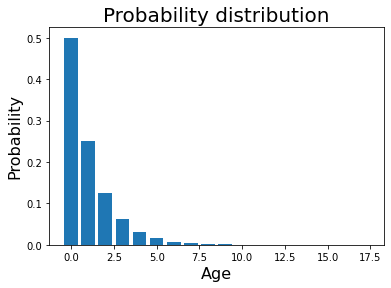

In [ ]:
fig, ax = plt.subplots()
plt.bar(edad, P)
axes = plt.gca() 
ax.set_ylabel('Probability')
ax.set_xlabel('Age')
ax.set_title('Probability distribution')
axes.title.set_size(20)
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.savefig('Probabilitym18_2.png')
plt.show()